# ATAC seq analysis

Assay for Transposase-Accessible Chromatin

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import quantile_normalize

## Analyzing Peaks

In [2]:
peaks = pd.read_csv("../data/psd.bulk.zfish_atac.10hpf.lg1x.csv")

In [3]:
peaks.head()

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
0,4.612648,5.204557,3.391132,4.552681,3.668004,4.766655,4.012215,4.486644,4.463738,4.861570,3.614023,3.696712,3.210026,4.679626,4.277916
1,4.721959,5.358137,3.557652,4.688727,3.546239,4.748463,4.012215,4.399901,4.690443,4.848311,3.776074,3.959122,3.531244,4.750276,4.439449
2,4.806994,5.338711,3.360469,4.163852,3.668004,4.955051,4.129443,4.353534,4.787046,4.735389,3.574781,4.325414,4.545861,4.917399,5.058778
3,4.879061,5.578282,4.236443,4.404106,4.145129,4.893466,4.429041,4.558759,4.650654,4.885431,4.076645,4.572297,4.306987,5.019714,4.859518
4,5.052703,5.736003,4.323331,4.790483,4.440677,5.033977,4.375875,4.868698,5.025405,5.054618,4.130548,4.473848,4.426082,5.211885,5.306444


In [4]:
peaks.shape

(370058, 15)

In [5]:
peaks.columns

Index(['anterior/posterior axis', 'central nervous system', 'forebrain',
       'immature eye', 'integument', 'lateral plate mesoderm',
       'mesenchyme cell', 'musculature system', 'neural crest', 'neural keel',
       'neural stem cell', 'periderm/epidermis', 'primary neuron',
       'segmental plate', 'YSL'],
      dtype='object')

### To do

- ✅ Check if the distribution of all the cell types are similar
- ✅ Look at the counts of the cell types
- ✅ Look at the distributions of the max, min, medium of the peaks (locations and regions in the genome)
- ✅ Look at the distribution of standard deviation and coefficient of variation (R2) of the peaks
- Use the gRELU package to train the model:
    - Start with a snippet e.g. 1000 peaks
    - If it works:
        - Extend to all peaks and run on GPU e.g. 480 (16 GB)
    - Get the model trained and then use the trained model to analyze seqs

### Distribution of all cell types

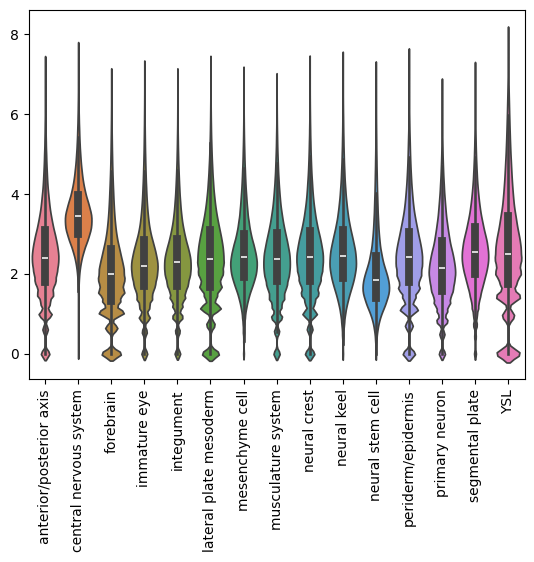

In [6]:
sns.violinplot(peaks)
plt.xticks(rotation = 90)
plt.show()

/home/fgsasse_lrs_2/miniconda3/envs/lab-rotation/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/fgsasse_lrs_2/miniconda3/envs/lab-rotation/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


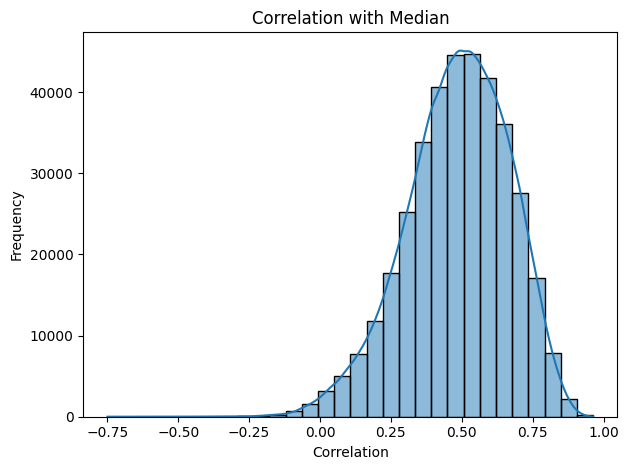

In [7]:

# plot the correlation of each data point across columns to the median
# Calculate the median
median = peaks.median(axis=0)
# Calculate the correlation of each data point with the median
correlation = peaks.corrwith(median, axis=1)
sns.histplot(correlation, bins=30, kde=True)
plt.title('Correlation with Median')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.tight_layout()
_ = plt.show()

### Counts of Peaks of Cell Types

In [8]:
peaks.describe()

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
count,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000
mean,2.473024,3.536111,2.023562,2.321343,2.346497,2.407008,2.532922,2.425564,2.447764,2.572684,2.064080,2.437607,2.253972,2.627580,2.613370
std,1.070666,0.827313,1.127322,1.023766,0.973497,1.160747,0.923803,1.022150,1.079779,0.987327,0.987930,1.124375,1.003211,0.971848,1.435154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.789679,2.998886,1.305784,1.680234,1.703114,1.655804,1.915261,1.819059,1.807913,1.898183,1.401331,1.798457,1.559132,1.989127,1.747344
50%,2.395626,3.441339,1.984860,2.197871,2.300787,2.354598,2.409666,2.360297,2.415504,2.442039,1.841349,2.405200,2.141170,2.531056,2.489766
75%,3.081055,3.965430,2.606833,2.833898,2.860317,3.099481,3.004450,3.005098,3.062962,3.090720,2.451874,3.052174,2.812083,3.161576,3.434497
max,7.277513,7.664428,6.962817,7.172454,6.985725,7.268406,7.033311,6.855766,7.287214,7.398556,7.155829,7.462169,6.726133,7.145679,7.960923


### Quantile normalization of peaks

In [9]:
import numpy as np

In [10]:
peaks.columns.is_unique

True

In [11]:
df_sorted = pd.DataFrame(np.sort(peaks.values, axis=0), index=peaks.index, columns=peaks.columns)
df_sorted

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370053,7.167753,7.374600,6.879665,7.020755,6.756389,7.064274,6.732973,6.685861,7.103982,7.158713,6.972517,7.047686,6.557317,7.039992,7.907732
370054,7.170952,7.445451,6.880587,7.034955,6.802342,7.119773,6.761015,6.694119,7.143010,7.213888,7.000056,7.061611,6.586213,7.073957,7.928439
370055,7.203635,7.484753,6.905164,7.086172,6.886067,7.138450,6.778871,6.722052,7.197884,7.332518,7.032997,7.150853,6.686330,7.085467,7.935812
370056,7.270597,7.639064,6.907858,7.138944,6.956215,7.260993,6.876432,6.726486,7.201057,7.338068,7.111558,7.182750,6.691781,7.117093,7.943132


In [12]:
df_mean = df_sorted.mean(axis=1)
df_mean

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
370053    7.031347
370054    7.061091
370055    7.108468
370056    7.157468
370057    7.223795
Length: 370058, dtype: float64

In [13]:
df_mean.index = np.arange(1, len(df_mean) + 1)
df_mean

1         0.000000
2         0.000000
3         0.000000
4         0.000000
5         0.000000
            ...   
370054    7.031347
370055    7.061091
370056    7.108468
370057    7.157468
370058    7.223795
Length: 370058, dtype: float64

In [14]:
normalized_peaks = quantile_normalize(peaks)
normalized_peaks

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
0,4.658859,4.533672,3.744909,4.677198,3.910345,4.776952,4.074234,4.654862,4.511633,4.800124,3.995971,3.671893,3.417105,4.706086,3.662167
1,4.759777,4.715077,3.915141,4.802952,3.762256,4.759200,4.074087,4.553247,4.739486,4.790696,4.128371,3.930637,3.762256,4.786094,3.768121
2,4.851202,4.694130,3.741332,4.328792,3.891091,4.966067,4.201415,4.509935,4.834991,4.681877,3.961688,4.280661,4.920982,4.964999,4.249963
3,4.918804,4.971179,4.511633,4.538608,4.418892,4.899892,4.531088,4.722845,4.691382,4.823491,4.373438,4.534809,4.642561,5.069323,4.093997
4,5.091230,5.155695,4.589974,4.901204,4.731492,5.050992,4.468658,5.062934,5.074762,4.985431,4.415342,4.427364,4.779970,5.267927,4.454447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370053,2.385099,1.837305,1.710130,1.723122,2.184391,2.326503,1.820542,1.922973,1.471810,2.651219,2.077131,2.268933,1.552899,2.468091,2.502551
370054,3.310180,3.806458,2.857530,3.068696,3.365575,4.251009,3.218051,3.538135,3.645372,3.987058,3.310180,3.322940,3.442145,3.689176,2.822574
370055,2.983381,2.334474,2.777409,2.813908,2.786776,2.216906,3.053263,2.759981,3.251418,3.467993,2.507627,1.933072,2.805062,2.717196,1.456314
370056,3.136339,1.905814,0.985993,1.995366,2.621371,2.621371,3.126667,2.756784,2.290252,2.825516,2.608640,2.515921,2.649961,1.977763,2.763079


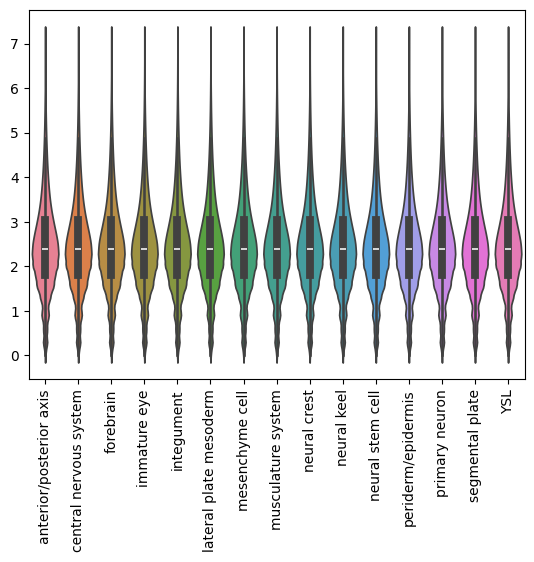

In [15]:
sns.violinplot(normalized_peaks)
plt.xticks(rotation = 90)
_ = plt.show()

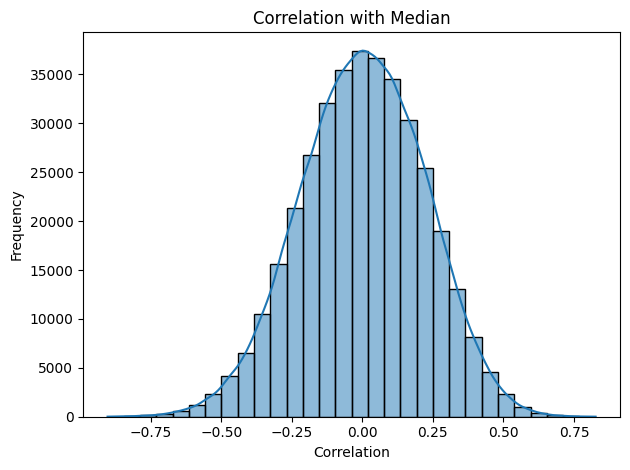

In [16]:
# plot the correlation of each data point across columns to the median
# Calculate the median
median = peaks.median(axis=0)
# Calculate the correlation of each data point with the median
correlation = normalized_peaks.corrwith(median, axis=1)
sns.histplot(correlation, bins=30, kde=True)
plt.title('Correlation with Median')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.tight_layout()
_ = plt.show()

/tmp/ipykernel_1147501/1682272367.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
/tmp/ipykernel_1147501/1682272367.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)


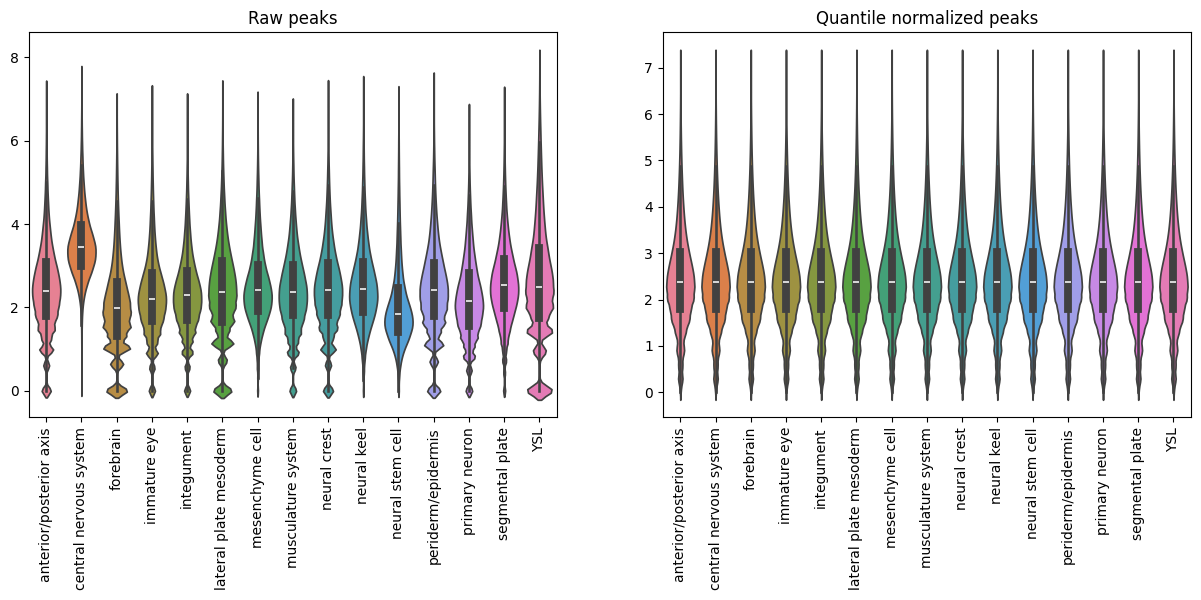

In [17]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.violinplot(peaks, ax = ax[0])
ax[0].set_title('Raw peaks')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
sns.violinplot(normalized_peaks, ax = ax[1])
ax[1].set_title('Quantile normalized peaks')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)
_ = plt.show()

In [18]:
normalized_peaks.index.name = 'position #'
normalized_peaks.head()

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
position #,,,,,,,,,,,,,,,
0,4.658859,4.533672,3.744909,4.677198,3.910345,4.776952,4.074234,4.654862,4.511633,4.800124,3.995971,3.671893,3.417105,4.706086,3.662167
1,4.759777,4.715077,3.915141,4.802952,3.762256,4.759200,4.074087,4.553247,4.739486,4.790696,4.128371,3.930637,3.762256,4.786094,3.768121
2,4.851202,4.694130,3.741332,4.328792,3.891091,4.966067,4.201415,4.509935,4.834991,4.681877,3.961688,4.280661,4.920982,4.964999,4.249963
3,4.918804,4.971179,4.511633,4.538608,4.418892,4.899892,4.531088,4.722845,4.691382,4.823491,4.373438,4.534809,4.642561,5.069323,4.093997
4,5.091230,5.155695,4.589974,4.901204,4.731492,5.050992,4.468658,5.062934,5.074762,4.985431,4.415342,4.427364,4.779970,5.267927,4.454447


In [19]:
normalized_peaks.to_csv('../data/normalized_peaks.csv', index = True)

## Analyzing BED file

In [20]:
bed_data = pd.read_csv("../data/chromosomes.10hpf.bed", sep = '\t', header = None)
bed_data.columns = ['chrom', 'start', 'end', 'name', 'score', 'strand']

In [21]:
bed_data.head()

,chrom,start,end,name,score,strand
0,chr1,5231,5732,.,0,.
1,chr1,5786,6287,.,0,.
2,chr1,10087,10588,.,0,.
3,chr1,10990,11491,.,0,.
4,chr1,11894,12395,.,0,.


In [22]:
bed_data.describe()

,start,end,score
count,3.700580e+05,3.700580e+05,370058.0
mean,2.712686e+07,2.712736e+07,0.0
std,1.689309e+07,1.689309e+07,0.0
min,3.600000e+01,5.370000e+02,0.0
25%,1.321669e+07,1.321719e+07,0.0
50%,2.621427e+07,2.621477e+07,0.0
75%,3.948675e+07,3.948725e+07,0.0
max,7.808975e+07,7.809026e+07,0.0


In [23]:
bed_data['score'].unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
370053    0
370054    0
370055    0
370056    0
370057    0
Name: score, Length: 370058, dtype: int64>